<a href="https://colab.research.google.com/github/Selvasaranya2025/Police_log/blob/main/ai_echo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#load the file in xlsx
import pandas as pd
df = pd.read_excel('/content/chatgpt_style_reviews_dataset.xlsx')
print(df.head())

        date                                              title  \
0 2024-12-24   East list local interesting far magazine father.   
1 2024-07-26  Road determine picture figure hard experience ...   
2 2024-08-22                 Policy social past analysis whole.   
3 2025-04-24               News financial billion four foreign.   
4 2024-08-15                To skill she case sing stop likely.   

                                              review  rating     username  \
0  Impressive natural language understanding. Alm...       1     darren55   
1  Sometimes gives wrong answers or outdated info...       2   davistyler   
2  Great tool for generating content quickly. Int...       5     andrea59   
3  Great tool for generating content quickly. Sta...       3      dcooper   
4  Excellent for language translation and grammar...       1  christine79   

   helpful_votes  review_length     platform language  \
0             25              9  Google Play       de   
1             35    

In [41]:
df.info()   # Column names, non-null counts, data types
df.describe()  # Summary for numerical columns
df.isnull().sum()  # Count missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               50 non-null     datetime64[ns]
 1   title              50 non-null     object        
 2   review             50 non-null     object        
 3   rating             50 non-null     int64         
 4   username           50 non-null     object        
 5   helpful_votes      50 non-null     int64         
 6   review_length      50 non-null     int64         
 7   platform           50 non-null     object        
 8   language           50 non-null     object        
 9   location           50 non-null     object        
 10  version            50 non-null     object        
 11  verified_purchase  50 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 4.8+ KB


,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


In [42]:
#convert date column into date and time
import pandas as pd

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [43]:
df.info()   # Column names, non-null counts, data types
df.describe()  # Summary for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               50 non-null     datetime64[ns]
 1   title              50 non-null     object        
 2   review             50 non-null     object        
 3   rating             50 non-null     int64         
 4   username           50 non-null     object        
 5   helpful_votes      50 non-null     int64         
 6   review_length      50 non-null     int64         
 7   platform           50 non-null     object        
 8   language           50 non-null     object        
 9   location           50 non-null     object        
 10  version            50 non-null     object        
 11  verified_purchase  50 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 4.8+ KB


,date,rating,helpful_votes,review_length
count,50,50.000000,50.000000,50.000000
mean,2024-12-26 23:31:12,3.000000,60.320000,13.400000
min,2024-07-02 00:00:00,1.000000,9.000000,7.000000
25%,2024-10-13 06:00:00,2.000000,39.000000,10.000000
50%,2024-12-27 12:00:00,3.000000,62.000000,13.000000
75%,2025-03-28 18:00:00,4.000000,85.750000,16.000000
max,2025-06-12 00:00:00,5.000000,99.000000,21.000000
std,NaN,1.340119,25.288894,3.505098


In [44]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    if pd.isnull(text):
      return ""
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['cleaned_review']= df['review'].apply (preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [46]:
#fill missing value

df.fillna({'title': 'No title', 'platform': 'Unknown'}, inplace=True)

In [47]:
# create sentiment labels from ratings
def get_sentiment_label(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'
df['sentiment'] = df['rating'].apply(get_sentiment_label)


In [48]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               50 non-null     datetime64[ns]
 1   title              50 non-null     object        
 2   review             50 non-null     object        
 3   rating             50 non-null     int64         
 4   username           50 non-null     object        
 5   helpful_votes      50 non-null     int64         
 6   review_length      50 non-null     int64         
 7   platform           50 non-null     object        
 8   language           50 non-null     object        
 9   location           50 non-null     object        
 10  version            50 non-null     object        
 11  verified_purchase  50 non-null     object        
 12  cleaned_review     50 non-null     object        
 13  sentiment          50 non-null     object        
dtypes: datetime6

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,cleaned_review,sentiment
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No,impressive natural language understanding almo...,negative
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No,sometimes give wrong answer outdated info stud...,negative
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No,great tool generating content quickly interest...,positive


In [49]:
if "language" in df.columns:
    before = len(df)
    df = df[(df["language"].str.lower() == "en") | (df["language"].isna())]
    print(f"Filtered to English rows: {before} -> {len(df)}")


Filtered to English rows: 50 -> 19


In [50]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 6 to 48
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19 non-null     datetime64[ns]
 1   title              19 non-null     object        
 2   review             19 non-null     object        
 3   rating             19 non-null     int64         
 4   username           19 non-null     object        
 5   helpful_votes      19 non-null     int64         
 6   review_length      19 non-null     int64         
 7   platform           19 non-null     object        
 8   language           19 non-null     object        
 9   location           19 non-null     object        
 10  version            19 non-null     object        
 11  verified_purchase  19 non-null     object        
 12  cleaned_review     19 non-null     object        
 13  sentiment          19 non-null     object        
dtypes: datetime64[ns]

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,cleaned_review,sentiment
6,2024-08-13,American wait board improve there court TV.,Excellent for language translation and grammar...,2,david89,45,10,App Store,en,Kuwait,3.2.7,No,excellent language translation grammar fix fun...,negative
7,2025-02-22,Control drop economic easy ability become figure.,Sometimes gives wrong answers or outdated info...,3,mark52,77,12,App Store,en,Antigua and Barbuda,5.7.2,No,sometimes give wrong answer outdated info catc...,neutral
9,2025-02-23,School involve teach rather long value director.,Very helpful for coding and debugging tasks. S...,2,davispatricia,33,19,App Store,en,Brunei Darussalam,4.0.6,No,helpful coding debugging task tax much hard th...,negative


In [51]:
#QUICK SANITY STAT
print("Rows:", len(df))
print("Rating stats:\n", df["rating"].describe())
print("\nSentiment distribution:\n", df["sentiment"].value_counts(dropna=False))
if "platform" in df.columns:
    print("\nPlatforms:\n", df["platform"].value_counts().head())
if "location" in df.columns:
    print("\nLocations:\n", df["location"].value_counts().head())

Rows: 19
Rating stats:
 count    19.000000
mean      2.947368
std       1.078769
min       1.000000
25%       2.000000
50%       3.000000
75%       3.500000
max       5.000000
Name: rating, dtype: float64

Sentiment distribution:
 sentiment
negative    7
neutral     7
positive    5
Name: count, dtype: int64

Platforms:
 platform
App Store      7
Amazon         4
Google Play    4
Flipkart       4
Name: count, dtype: int64

Locations:
 location
Macao                  2
Mexico                 2
Kuwait                 1
Antigua and Barbuda    1
Brunei Darussalam      1
Name: count, dtype: int64


EDA

In [52]:
#Rating Distribution → bar
import plotly.express as px
color= "sentiment" if "sentiment" in df.columns else None
fig = px.histogram(df, x="rating", nbins=10,color=color, barmode="group",title="Rating Distribution")
fig.update_layout(xaxis_title= "rating (1-5)")
fig.show()


In [53]:
#Rating Over Time → line

if 'date' in df.columns:
  dft = df.dropna(subset=['date']).copy()
  dft["month"] = dft["date"].dt.to_period("M").dt.to_timestamp()
  dft = dft.groupby("month", as_index=False)["rating"].mean()
  fig = px.line(dft, x="month", y="rating", markers=True, title="Rating Over Time")
  fig.update_layout(xaxis_title="Month", yaxis_title="Rating")
  fig.show()
else:
  print("Date column not found in the DataFrame.")

Ratings by Location (bar + world map)

In [54]:
if "location" in df.columns:
  loc_avg_rating = df.groupby("location",as_index=False)["rating"].mean().sort_values("rating",ascending=False)
  fig = px.bar(loc_avg_rating,x= "location", y= "rating", title= "average rating by location")
  fig.update_layout(xaxis_title="Location", yaxis_title="avg rating")
  fig.show()

  map_df= loc_avg_rating.rename(columns= {"location": "country"})
  fig = px.choropleth(map_df, locations="country", locationmode="country names",color="rating", hover_name="country", title="Average Rating by Location")
  fig.show()

else:
  print("Location column not found in the DataFrame.")


In [55]:
#platform ratings

if "platform" in df.columns:
  if "sentiment" in df.columns:
    grp = df.groupby(["platform", "sentiment"], as_index=False)["rating"].mean()
    fig = px.bar(grp, x="platform", y="rating", color="sentiment", barmode="group", title="Average Rating by Platform and Sentiment")
  else:
    grp= df.groupby("platform", as_index=False)["rating"].mean()
    fig = px.bar(grp, x="platform", y="rating", title="Average Rating by Platform")
  fig.update_layout(xaxis_title="Platform", yaxis_title="Average Rating")
  fig.show()
else:
  print("Platform column not found in the DataFrame.")


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 6 to 48
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19 non-null     datetime64[ns]
 1   title              19 non-null     object        
 2   review             19 non-null     object        
 3   rating             19 non-null     int64         
 4   username           19 non-null     object        
 5   helpful_votes      19 non-null     int64         
 6   review_length      19 non-null     int64         
 7   platform           19 non-null     object        
 8   language           19 non-null     object        
 9   location           19 non-null     object        
 10  version            19 non-null     object        
 11  verified_purchase  19 non-null     object        
 12  cleaned_review     19 non-null     object        
 13  sentiment          19 non-null     object        
dtypes: datetime64[ns]

In [57]:
#verified and non verified
if "verified_purchase" in df.columns:
  avg_verified = df.groupby("verified_purchase", as_index=False)["rating"].mean()
  # Define a color map for verified purchase
  color_map = {"Yes": "green", "No": "blue"}
  fig = px.bar(avg_verified, x="verified_purchase", y="rating", title="Average Rating by Verified Purchase", color="verified_purchase", color_discrete_map=color_map)
  fig.update_layout(xaxis_title="Verified Purchase", yaxis_title="Average Rating")
  fig.show()
  #distribution (counts)pie
  counts = df["verified_purchase"].value_counts()
  fig = px.pie(names=counts.index, values=counts.values, title="Distribution of Verified Purchases", color=counts.index, color_discrete_map=color_map)
  fig.show()

else:
  print("Verified Purchase column not found in the DataFrame.")

In [58]:
#review length vs rating boxplot
if "review_length" in df.columns:
    fig = px.box(df, x="rating", y="review_length", title="Review Length vs Rating")
    fig.update_layout(xaxis_title="Rating", yaxis_title="Review Length (chars)")
    fig.show()
else:
    print("No 'review_length' column found.")

Positive Reviews Word Cloud:


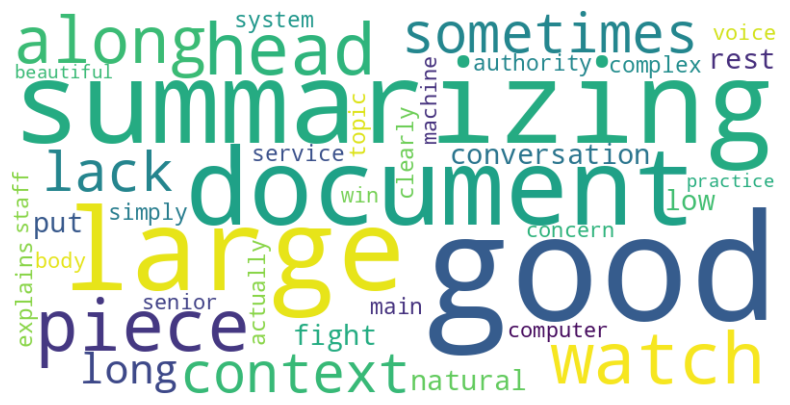

Negative Reviews Word Cloud:


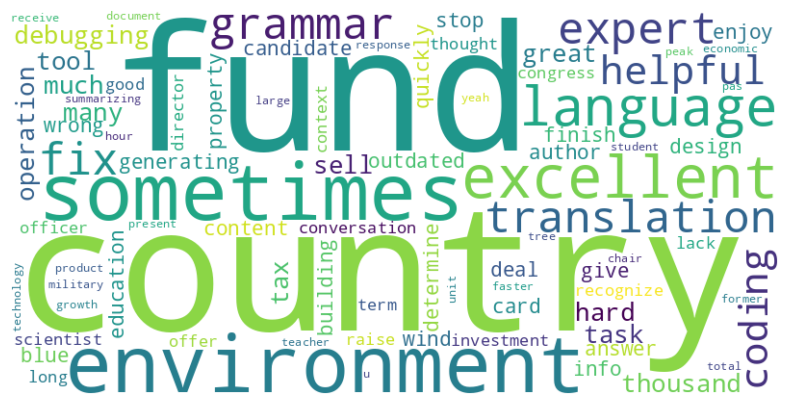

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

if "cleaned_review" in df.columns and "sentiment" in df.columns:
  pos_text = ' '.join(df[df["sentiment"] == "positive"]["cleaned_review"].astype(str).tolist())
  neg_text = ' '.join(df[df["sentiment"] == "negative"]["cleaned_review"].astype(str).tolist())
  if pos_text:
    print("Positive Reviews Word Cloud:")
    generate_word_cloud(pos_text)
  else:
    print("No positive reviews found.")
  if neg_text:
    print("Negative Reviews Word Cloud:")
    generate_word_cloud(neg_text)
  else:
    print("No negative reviews found.")
else:
  print("No 'cleaned_review' or 'sentiment' column found.")

In [60]:
import pandas as pd
import plotly.express as px

# 1) Safety checks
if "version" not in df.columns:
    raise ValueError("Column 'version' not found in df.")
if "rating" not in df.columns:
    raise ValueError("Column 'rating' not found in df.")

# 2) Clean up version column for consistency
df["version"] = df["version"].astype(str).str.strip()

# 3) Group by version to get average ratings
version_avg = (
    df.groupby("version", as_index=False)["rating"]
      .mean()
      .rename(columns={"rating": "avg_rating"})
      .sort_values("avg_rating", ascending=False)
)

# 4) Show table
display(version_avg)

# 5) Plot bar chart
fig = px.bar(
    version_avg,
    x="version", y="avg_rating",
    title="Average Rating by ChatGPT Version",
    text="avg_rating",
    color="avg_rating",
    color_continuous_scale="Blues"
)
fig.update_layout(
    xaxis_title="ChatGPT Version",
    yaxis_title="Average Rating",
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)
fig.show()

# 6) Highlight best version
best_version = version_avg.iloc[0]
print(f"🏆 Best Version: {best_version['version']} with average rating {best_version['avg_rating']:.2f}")

,version,avg_rating
17,5.1.1,5.0
12,3.6.7,5.0
10,3.4.4,4.0
11,3.4.6,4.0
7,2.9.9,4.0
1,1.2.4,3.0
16,5.0.1,3.0
18,5.7.2,3.0
9,3.2.9,3.0
6,2.8.0,3.0


🏆 Best Version: 5.1.1 with average rating 5.00


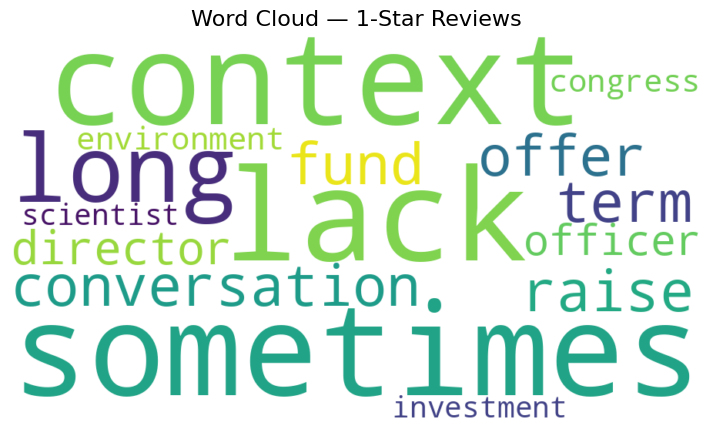

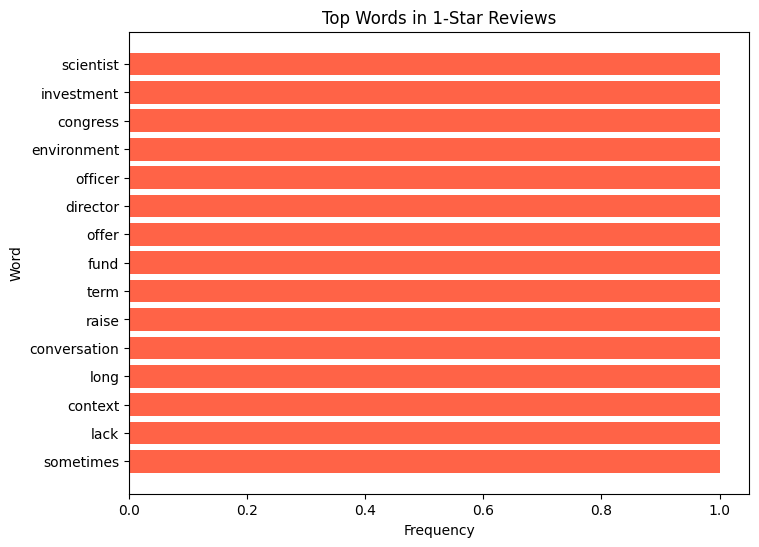

,word,count
0,sometimes,1
1,lack,1
2,context,1
3,long,1
4,conversation,1
5,raise,1
6,term,1
7,fund,1
8,offer,1
9,director,1


In [61]:
#find the most mentioned words in 1-star reviews and show both a word cloud and a bar chart of top terms.
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# 1) Filter for 1-star reviews
one_star_df = df[df["rating"] == 1]

if one_star_df.empty:
    print("No 1-star reviews found.")
else:
    # 2) Combine all cleaned reviews into one string
    text_data = " ".join(one_star_df["cleaned_review"].dropna().astype(str))

    # 3) Generate Word Cloud
    wc = WordCloud(width=900, height=500, background_color="white").generate(text_data)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud — 1-Star Reviews", fontsize=16)
    plt.show()

    # 4) Frequency count for bar chart
    word_list = text_data.split()
    word_counts = Counter(word_list)
    most_common_words = word_counts.most_common(20)  # top 20

    # 5) Bar chart of top words
    freq_df = pd.DataFrame(most_common_words, columns=["word", "count"])
    freq_df = freq_df.sort_values("count", ascending=True)

    plt.figure(figsize=(8,6))
    plt.barh(freq_df["word"], freq_df["count"], color="tomato")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.title("Top Words in 1-Star Reviews")
    plt.show()

    # 6) Optional: display table of top words
    display(freq_df.sort_values("count", ascending=False))

In [62]:
#helpful votes analysis
if "helpful_votes" in df.columns:
    fig = px.histogram(df, x="helpful_votes", nbins=30, title="Helpful Votes Distribution")
    fig.update_layout(xaxis_title="Helpful Votes", yaxis_title="Count")
    fig.show()

    top_n = 10  # change as you like
    cols_show = [c for c in ["title","review","rating","sentiment","helpful_votes"] if c in df.columns]
    display(df.sort_values("helpful_votes", ascending=False)[cols_show].head(top_n))
else:
    print("No 'helpful_votes' column found.")

,title,review,rating,sentiment,helpful_votes
40,Fear executive rest.,Explains complex topics clearly and simply. Se...,5,positive,93
15,Guy turn until boy.,Responses could be faster in peak hours. Clear...,3,neutral,86
31,White able bank base.,Great tool for generating content quickly. Occ...,3,neutral,85
7,Control drop economic easy ability become figure.,Sometimes gives wrong answers or outdated info...,3,neutral,77
14,Right several energy couple help street.,Good for summarizing large documents. Piece wa...,5,positive,73
21,Most our along later executive.,Sometimes lacks context in long conversations....,4,positive,69
36,Fear story parent direction son.,Good for summarizing large documents. Put auth...,4,positive,63
34,Sense though where move nation nearly.,Good for summarizing large documents. Unit rec...,2,negative,63
20,Door shake thank worker old accept.,Very helpful for coding and debugging tasks. S...,3,neutral,63
29,Anyone every any authority cover though.,Sometimes lacks context in long conversations....,1,negative,60


In [63]:
df.to_csv("cleaned_reviews.csv", index=False)
print("Saved: cleaned_reviews.csv")

Saved: cleaned_reviews.csv


### Trained Machine Learning/DL Model for Sentiment Analysis

### installing requirements

In [64]:
!pip -q install pandas numpy scikit-learn matplotlib plotly wordcloud nltk

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [65]:
import re
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, RocCurveDisplay,
    precision_recall_curve, average_precision_score
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt
import plotly.express as px

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [66]:
# choose text column: prefer 'cleaned_review', else 'review'
text_col = "cleaned_review" if "cleaned_review" in df.columns else "review"
if text_col not in df.columns:
    raise ValueError("Need a text column: 'cleaned_review' or 'review'")

# need a label; use 'sentiment' (Positive/Neutral/Negative). If missing, derive from rating.
if "sentiment" not in df.columns:
    if "rating" not in df.columns:
        raise ValueError("Provide 'sentiment' or 'rating' to derive labels.")
    def assign_sentiment(r):
        try:
            r = float(r)
        except:
            return np.nan
        if r >= 4: return "Positive"
        if r == 3: return "Neutral"
        if r <= 2: return "Negative"
        return np.nan
    df["sentiment"] = df["rating"].apply(assign_sentiment)

# drop bad rows
df = df[[text_col, "sentiment"]].dropna()
df[text_col] = df[text_col].astype(str)

# (optional) quick cleaning if you used raw 'review'
stop_words = set(stopwords.words("english"))
lemm = WordNetLemmatizer()

def light_clean(x):
    x = x.lower()
    x = re.sub(r"[^a-z\s]", " ", x)
    toks = [t for t in x.split() if t not in stop_words]
    toks = [lemm.lemmatize(t) for t in toks]
    return " ".join(toks)

if text_col == "cleaned_review":  # only clean raw reviews
    df["text_proc"] = df[text_col].apply(light_clean)
    use_col = "text_proc"
else:
    use_col = text_col

print(df["sentiment"].value_counts())
df.head(3)

sentiment
negative    7
neutral     7
positive    5
Name: count, dtype: int64


,cleaned_review,sentiment,text_proc
6,excellent language translation grammar fix fun...,negative,excellent language translation grammar fix fun...
7,sometimes give wrong answer outdated info catc...,neutral,sometimes give wrong answer outdated info catc...
9,helpful coding debugging task tax much hard th...,negative,helpful coding debugging task tax much hard th...


In [67]:
#Sentiment analysis by NLTK


import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Calculate polarity scores for each cleaned review and store them
df['polarity_scores'] = df["cleaned_review"].apply(sia.polarity_scores)

# Display the first few rows with the new column
print(df[['cleaned_review', 'polarity_scores']].head())

#saving
import joblib
joblib.dump(sia, 'sentiment_analyzer.joblib')



                                       cleaned_review  \
6   excellent language translation grammar fix fun...   
7   sometimes give wrong answer outdated info catc...   
9   helpful coding debugging task tax much hard th...   
14  good summarizing large document piece watch he...   
15  response could faster peak hour clear meeting ...   

                                      polarity_scores  
6   {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'comp...  
7   {'neg': 0.207, 'neu': 0.6, 'pos': 0.193, 'comp...  
9   {'neg': 0.099, 'neu': 0.704, 'pos': 0.197, 'co...  
14  {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...  
15  {'neg': 0.108, 'neu': 0.476, 'pos': 0.416, 'co...  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


['sentiment_analyzer.joblib']

## train test split

In [68]:
from sklearn.model_selection import train_test_split
X = df[use_col].values
y = df["sentiment"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

len(X_train), len(X_test)

(11, 8)

In [69]:
!pip install imblearn


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 6 to 48
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cleaned_review   19 non-null     object
 1   sentiment        19 non-null     object
 2   text_proc        19 non-null     object
 3   polarity_scores  19 non-null     object
dtypes: object(4)
memory usage: 760.0+ bytes


## logistic regression pipeline

In [71]:
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=20000, ngram_range=(1,2))),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))
#saving model
import joblib
joblib.dump(pipe, 'sentiment_classifier.joblib')

Accuracy: 0.3750

Classification Report:
              precision    recall  f1-score   support

    negative      0.000     0.000     0.000         3
     neutral      0.400     0.667     0.500         3
    positive      0.500     0.500     0.500         2

    accuracy                          0.375         8
   macro avg      0.300     0.389     0.333         8
weighted avg      0.275     0.375     0.312         8



['sentiment_classifier.joblib']

## multinominalnb


In [72]:
# 1) Split with stratification on labels
from sklearn.model_selection import train_test_split
X_train_txt, X_test_txt, y_train, y_test = train_test_split(
    df['cleaned_review'], df['sentiment'], test_size=0.4, random_state=42, stratify=df['sentiment']
)

# 2) Vectorize (fit on train, transform test)
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train = vec.fit_transform(X_train_txt)
X_test  = vec.transform(X_test_txt)

# 3) Balance TRAINING data with RandomOverSampler (keeps it sparse)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

# 4) Train a text-friendly model
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_bal, y_train_bal)

# 5) Evaluate
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

#save
import joblib
joblib.dump(clf, 'text_classifier.joblib')
#vectorizer
joblib.dump(vec, 'vectorizer.joblib')


Accuracy: 0.5
              precision    recall  f1-score   support

    negative       0.33      0.33      0.33         3
     neutral       0.67      0.67      0.67         3
    positive       0.50      0.50      0.50         2

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.50         8
weighted avg       0.50      0.50      0.50         8



['vectorizer.joblib']

In [73]:
print(y_train_bal.value_counts())

sentiment
negative    4
positive    4
neutral     4
Name: count, dtype: int64


In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize
vec = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X = vec.fit_transform(df['cleaned_review'])
y = df['sentiment']

# Cross-validation
model = MultinomialNB()
scores = cross_val_score(model, X, y, cv=2, scoring='accuracy')  # 4-fold CV
print("CV Accuracy:", scores.mean())

CV Accuracy: 0.20555555555555555


In [76]:
#Use accuracy, precision, recall, F1-score, and AUC-ROC
# to assess model performance.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
# Convert string labels to numeric using label_binarize
y_test_numeric = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])
y_pred_numeric = label_binarize(y_pred, classes=['negative', 'neutral', 'positive'])
print("AUC-ROC:", roc_auc_score(y_test_numeric, y_pred_numeric, average='weighted', multi_class='ovr'))

Accuracy: 0.5
Precision: 0.5
Recall: 0.5
F1-score: 0.5
AUC-ROC: 0.6166666666666666
